# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


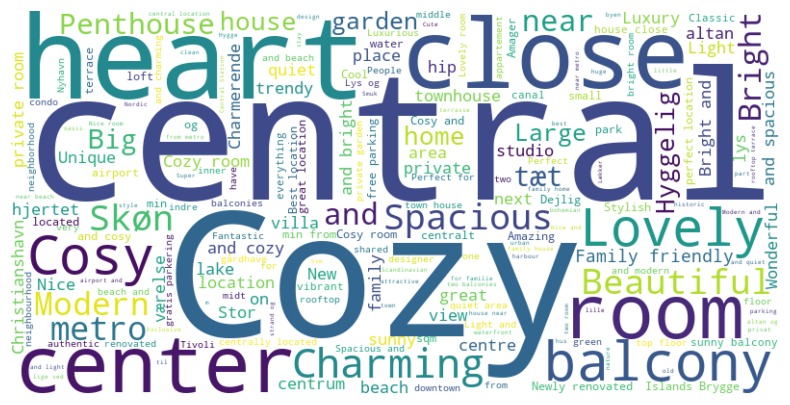

In [7]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace(r'[\$,]', '', regex=True).astype(float)


# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

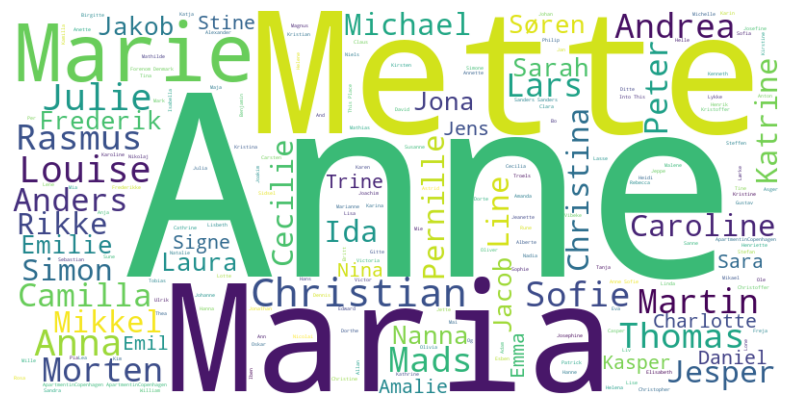

In [8]:
# Convert the 'host_name' column to a single string
text = ' '.join(data_filtered['host_name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

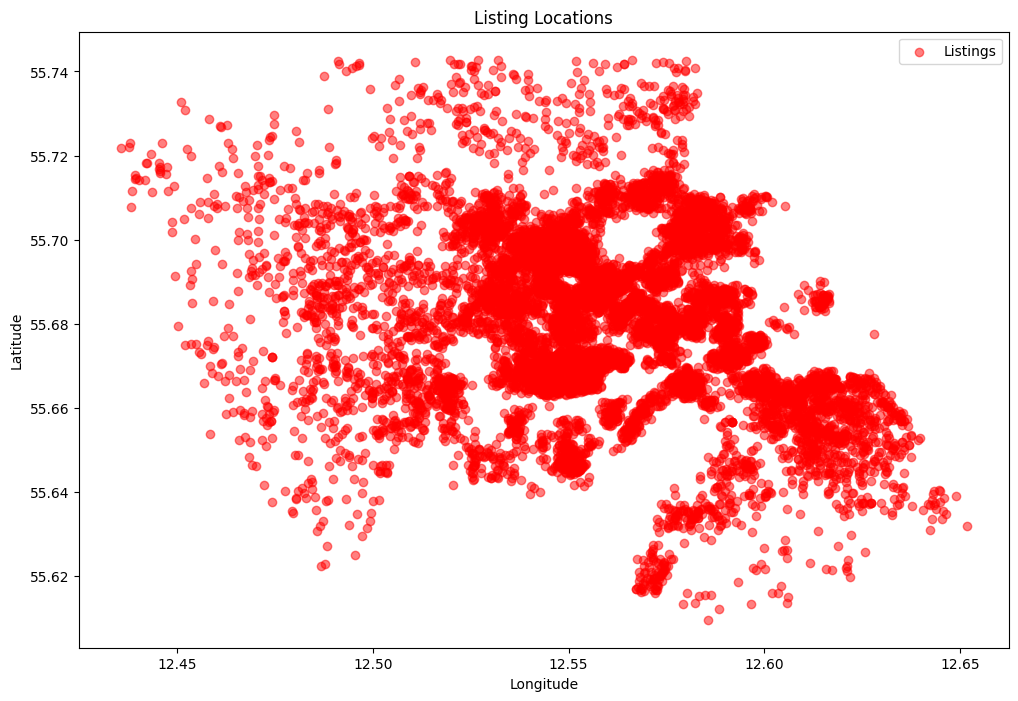

In [9]:
# Create a figure and axis
plt.figure(figsize=(12, 8))

# Scatter plot of latitude and longitude //Visualize the data points
plt.scatter(data_filtered['longitude'], data_filtered['latitude'], c='red', alpha=0.5, label="Listings")

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Listing Locations')

# Show legend
plt.legend()

# Show plot
plt.show()

### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

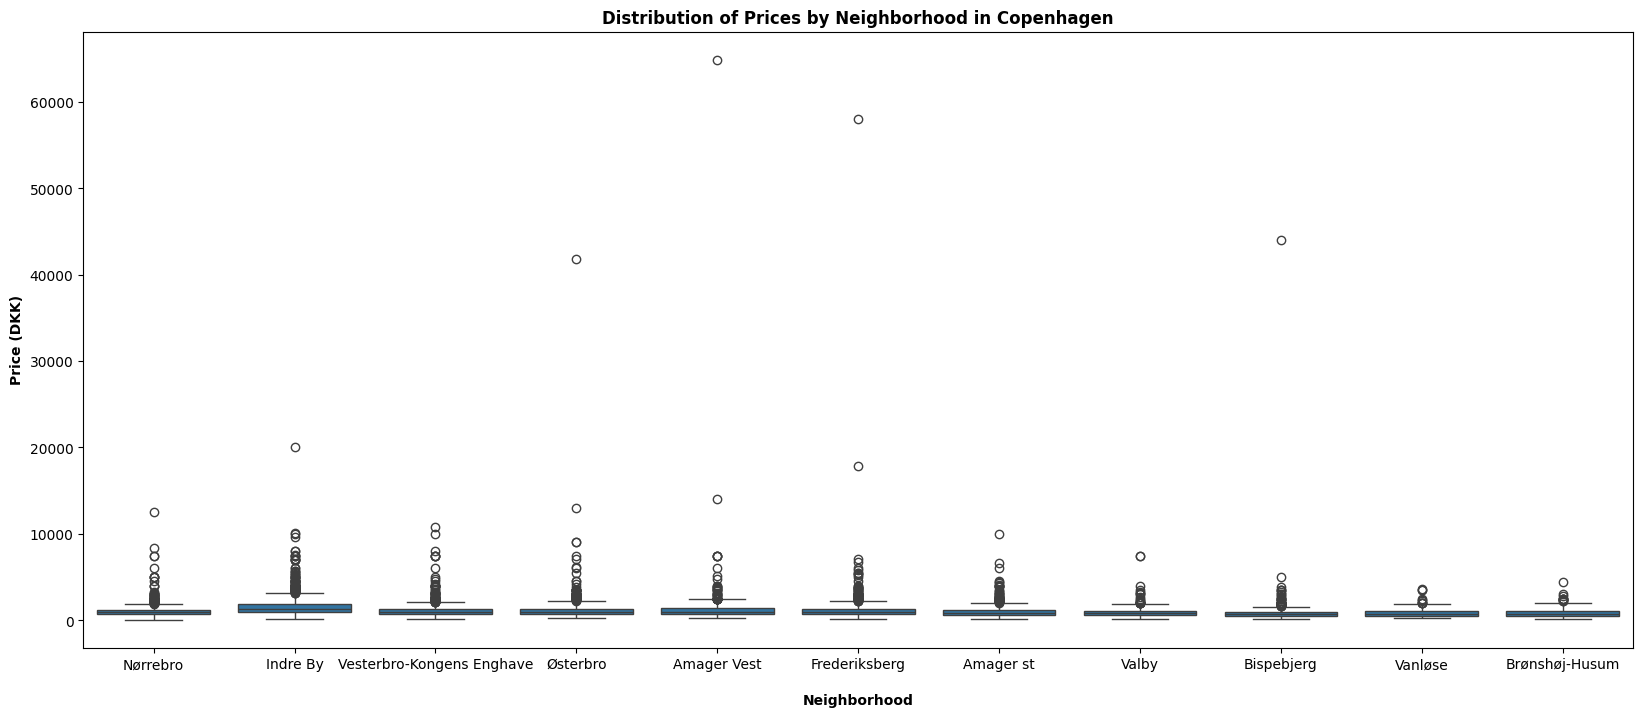

In [10]:
#Boxplot is a graph that shows how data is spread out.
#Input is x //Independentent value //Feature
#Output is y // Dependent value
#Outliers: These are data points that lie outside the general pattern

import seaborn as sns #data visualization library

#Create boxplot
# 1 Price by neighborhood
plt.figure(figsize=(20, 8))
sns.boxplot(x='neighbourhood_cleansed', y='price', data=data_filtered)

plt.xlabel('\nNeighborhood',fontweight='bold')
plt.ylabel('Price (DKK)',fontweight='bold')
plt.title('Distribution of Prices by Neighborhood in Copenhagen',fontweight='bold')
plt.show()

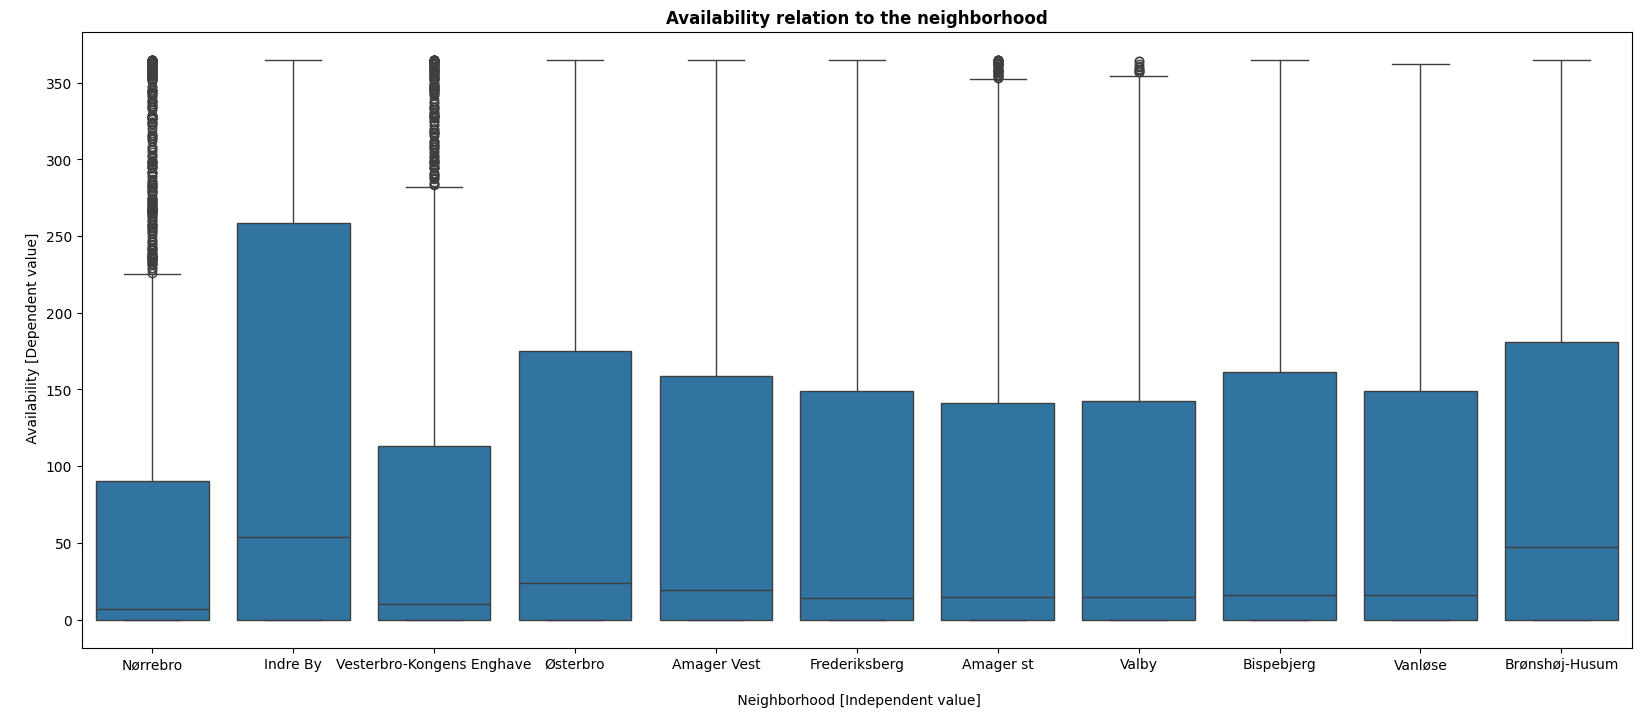

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

#Create boxplot
# 2 Number of Reviews
plt.figure(figsize=(20, 8))
sns.boxplot(x='neighbourhood_cleansed', y='availability_365', data=data_filtered)

plt.xlabel('\n Neighborhood [Independent value]')
plt.ylabel('\n Availability [Dependent value]')
plt.title('Availability relation to the neighborhood', fontweight='bold')
plt.show()


### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [12]:
# ~~ Goal ~~
#Count: The number of listings in each neighborhood.
#Average: The average price in each neighborhood.

#50% -Median: The median price, where half the listings are above and half are below this value.
#Standard Deviation (std): Show how much prices vary within each neighborhood.
#Min and Max: The lowest and highest price.
#25% and 75% -Quartiles: Divide dataset into First Quarter and Third Quarter

# Mode: Most common room type ?


import pandas as pd

# Group by neighborhood - Once the data is grouped -we can do analysis for each neighborhood.
grouped_data = data_filtered.groupby('neighbourhood_cleansed')  #group the data by the neighbourhood_cleansed column. 

# Descriptive statistics for price
#.describe() method automatically computes count, mean, standard deviation (std), minimum, quartiles (25%, 50% (median), 75%), and maximum.
price_stats = grouped_data['price'].describe()




display(price_stats )



,count,mean,std,min,25%,50%,75%,max
neighbourhood_cleansed,,,,,,,,
Amager Vest,1059.0,1205.754485,2121.656424,200.0,722.00,1000.0,1400.00,64900.0
Amager st,924.0,1019.860390,704.769611,135.0,650.00,851.0,1190.00,10000.0
Bispebjerg,604.0,912.066225,1831.810612,143.0,542.25,747.5,961.00,44000.0
Brønshøj-Husum,285.0,875.487719,552.009744,145.0,500.00,750.0,1100.00,4462.0
Frederiksberg,1177.0,1216.676296,1866.619993,185.0,750.00,1000.0,1339.00,58000.0
Indre By,1844.0,1570.907267,1065.975980,165.0,995.00,1350.0,1870.50,20000.0
Nørrebro,2057.0,1014.792902,609.390458,79.0,720.00,900.0,1199.00,12500.0
Valby,539.0,932.137291,622.836251,127.0,600.00,800.0,1119.50,7429.0
Vanløse,298.0,874.543624,502.561017,200.0,536.75,750.5,1091.75,3643.0


### 5. Based on self-chosen features, develop three different regression models that can predict the price of a rental property. Remember to divide your data into training data and test data. Comment on your findings.